In [2]:
%matplotlib inline
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import traml
import copy

In [3]:
a = traml.Stack()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [4]:
a.library.search('zns')

|     ID | SHELF   | BOOK           | PAGE     | DESCRIPTION                    |
|--------+---------+----------------+----------+--------------------------------|
| 101001 | main    | ZnSiAs2        | Boyd-o   | Boyd et al. 1972: n(o) 0.7-11. |
| 101002 | main    | ZnSiAs2        | Boyd-e   | Boyd et al. 1972: n(e) 0.7-11. |
| 114301 | main    | CdZnS          | Treharne | Treharne et al. 2014: n,k      |
| 114801 | main    | ZnS            | Debenham | Debenham 1984: Cubic ZnS; n 0. |
| 115701 | main    | ZnSe           | Connolly | Connolly et al. 1979: n 0.54-1 |
| 115702 | main    | ZnSe           | Marple   | Marple 1964: n 0.48-2.5 µm     |
| 314738 | glass   | SUMITA-molding | K-ZnSF8  | K-ZnSF8                        |


In [5]:
ag = 100101
sio2 = 111407
zno = 112003
cds = 114203
cdte= 116705
cdzns = 114301
cu=104301
zns = 114301


In [6]:
a = traml.Stack()
a.add(sio2, 5)
a.add(cu, 1)
a.add(ag, 5)
a.add(zno, 20)
a.add(cds, 30)
a.add(cdte, film_type='absorber')

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   2 |     104301 | 1                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   2 |     104301 | 1                | passive   |
|   3 |     100101 | 5                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+-----

In [7]:
a.jsc()

24.9754416023 (ma/cm^2)


24.975441602300613

In [8]:
a = traml.Stack()
a.add(sio2, 2)
a.add(cu, 1)
a.add(ag, 6)
a.add(zno, 5)
a.add(cds, 30)
a.add(cdte, film_type='absorber')

b = copy.deepcopy(a)

b.remove(5)
b.add(cdzns, 30, loc=5)

rho = 1e-6
jsc1 = []
jsc2 = []
rs = []
d = []


for i in range(0, 100):
    a.d(5,i)
    b.d(5,i)
    jsc1.append(a.jsc())
    jsc2.append(b.jsc())
    d.append(i)
    

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 2                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 2                | passive   |
|   2 |     104301 | 1                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 2                | passive   |
|   2 |     104301 | 1                | passive   |
|   3 |     100101 | 6                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+-----

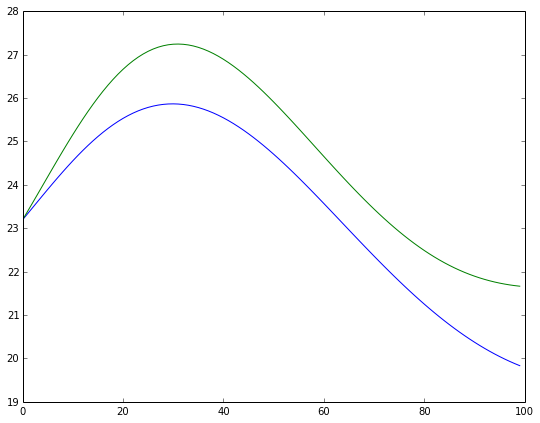

In [9]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
l1, = ax.plot(d, jsc1)
l2, = ax.plot(d, jsc2)


In [11]:
a = traml.Stack()
a.add(sio2, 5)
a.add(cu, 1)
a.add(ag, 10)
a.add(zno, 20)
a.add(cds, 30)
a.add(cdte, film_type='absorber')

    

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   2 |     104301 | 1                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 5                | passive   |
|   2 |     104301 | 1                | passive   |
|   3 |     100101 | 10               | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+-----

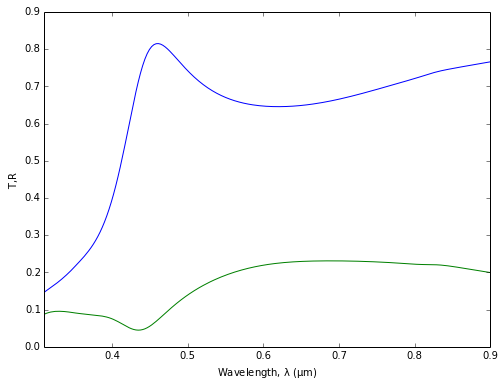

In [12]:
b.plot(o='a')

In [13]:
a.jsc()

21.1083588882 (ma/cm^2)


21.108358888165291

In [14]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta, o='a')
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [15]:
def minTR(stack, film_range, c, delta, TR='T'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append(stack.config[i][3])
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [16]:
c = traml.Stack()
c.subsinf = False

peak = 0.6
delta = 0.2
mat2 = 105401 #MgF2
sio2 = 111407 #SiO2
zns = 114801 #ZnS
zno = 112003 #ZnO
mgo = 110902 #MgO
#mat1 = 110104 #Al2O3
zro2 = 112101
stack_list = []

c.add(cu, 1, bnds=(1,1))
c.add(ag, 6, bnds=(6,6))
c.add(zno, 10, bnds = (5, 100))
c.add(cdzns, 50, bnds=(25, 100))
c.add(cdte, film_type='absorber')

stack_list.append(copy.deepcopy(c))
R=[]
point = []
point.append(c.jsc())
print point
n = [0]
it = [1]

result = minTR(c, [1,len(c.config)-2], peak, delta, TR='T')
point.append(c.jsc())
n.append(0)
stack_list.append(copy.deepcopy(c))

c.remove()
c.remove()
c.remove()
c.remove()
c.remove()

N = 2
for i in range(0, N):
    if i % 2 == 0:
        print 'even', i
        c.add(sio2,10, bnds=(1,100))
    else:
        c.add(sio2,10, bnds=(1,100))
        
    c.add(cu, 1,  bnds=(1,1))
    c.add(ag, 6, bnds = (6,6))
        
    c.add(zno, 10, bnds = (5, 100))
    c.add(cdzns, 50, bnds=(0, 100))
    c.add(cdte, film_type='absorber')
    
    
    result = minTR(c, [1,len(c.config)-2], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
    stack_list.append(copy.deepcopy(c))
    point.append(c.jsc())
    
    print c.config[i+3][1]
    
   
    c.table()
    print '============================================================================================'
    print c.average('T',peak,delta, o='a')
    
    
    if i !=N-1:
        c.remove()
        c.remove()
        c.remove()
        c.remove()
        c.remove()
        
    print '============================================================================================'
    
    
    
    
 

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     104301 | 1                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     104301 | 1                | passive   |
|   2 |     100101 | 6                | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     104301 | 1                | passive   |
|   2 |     100101 | 6                | passive   |
|   3 |     112003 | 10               | passive   |
|   # |   Material | Thickness (nm)   | Type      |
|-----+-----

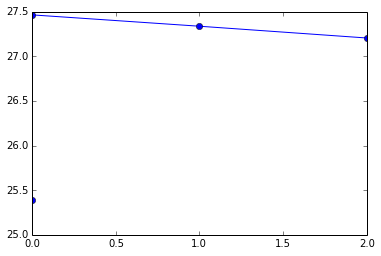

In [17]:
plt.plot(n, point, '-o')

In [21]:
%matplotlib 
c.subsinf=False
T1 = c.get_T(option='a')
R1 = c.get_R(option='a')
print c.jsc()
c.subsinf=True
T2 = c.get_T(option='a')
R2 = c.get_R(option='a')
print c.jsc()
x = c.x





fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

l1, = ax.plot(x, T1, '-', color='red', label='T')
l2, = ax.plot(x, R1, '-', color='blue', label = 'R')


leg = ax.legend(loc='center right', fontsize = 20)

ax.set_ylabel('T, R', fontsize=24)
ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=24)
ax.tick_params(labelsize = 20)
ax.set_ylim([0,1])
ax.set_xlim([0.35,0.9])


Using matplotlib backend: TkAgg
27.2043197826 (ma/cm^2)
27.2043197826
28.4251579741 (ma/cm^2)
28.4251579741


(0.35, 0.9)

In [ ]:
c.table()

In [ ]:
c.table()

In [ ]:
c.jsc()

In [ ]:
%matplotlib
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

l1, = ax.plot(c.x, stack_list[0].get_T(option='a'), '-', color='red', label='')



legend = ax.legend(loc='center right', fontsize=16)

#ax.set_xlim([0,14])
#ax.set_xlabel(r'Number of films', fontsize=20)
ax.set_ylabel('T, R', fontsize=20)
ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=24)
ax.tick_params(labelsize = 20)
ax.set_ylim([0,1])
ax.set_xlim([0.35,0.9])



#plt.plot(a.x, a.get_T(),)
#plt.plot(c.x, c.get_T())
#a.average('R', 0.6,0.3)
#plt.xlim([0.4, 0.9])

In [ ]:
e = traml.Stack()

In [ ]:
e.add(cdte, film_type='substrate')

In [ ]:
a.remove(0)

In [ ]:
e.add(cdte, 100)
e.add(cdte, film_type='substrate')

In [ ]:
a.remove(0)

In [ ]:
e.remove(0)

In [ ]:
e.table()

In [ ]:
e.d(1, 0)

In [ ]:
e.table()

In [ ]:
e.library.search('air')

In [ ]:
e.library.plot(401501)